# Gaussian Mixture Models

### Motivação

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [118]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

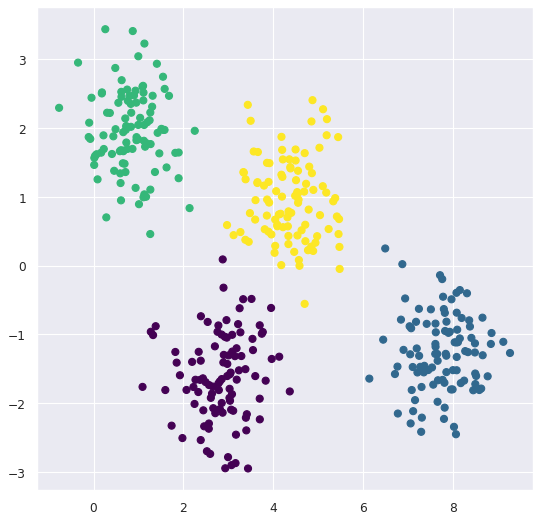

In [119]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [120]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    plt.figure(figsize=(8, 8), dpi=80)
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

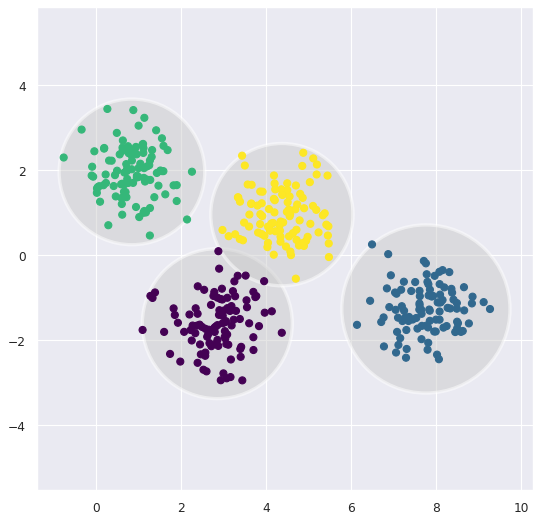

In [121]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

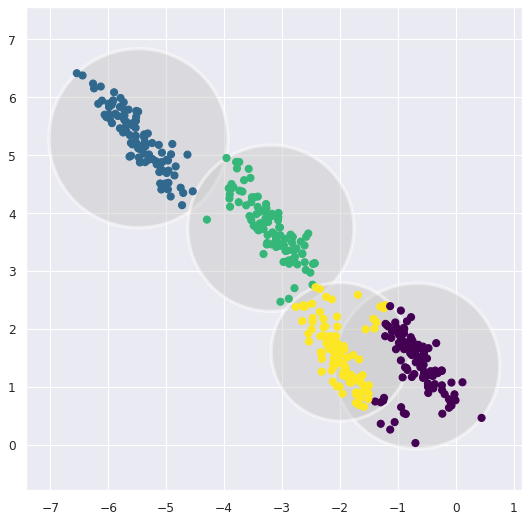

In [122]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

## Introdução

In [123]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [124]:
from sklearn.mixture import GaussianMixture

In [125]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [126]:
#vetor de pesos (fi)
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [127]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [128]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

Voltando aos dados do exemplo de motivação

In [129]:
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

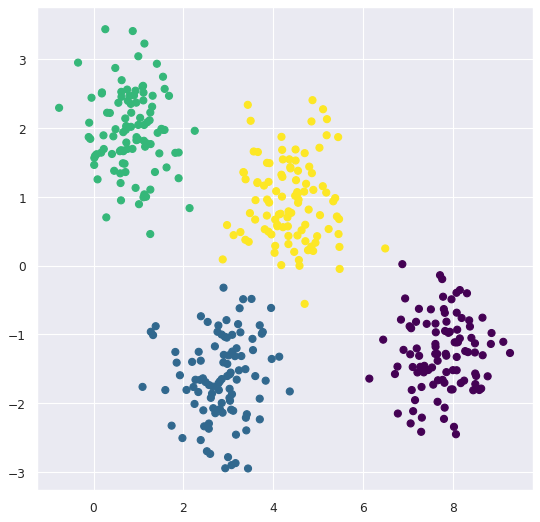

In [130]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [131]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.469 0.    0.    0.531]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]]


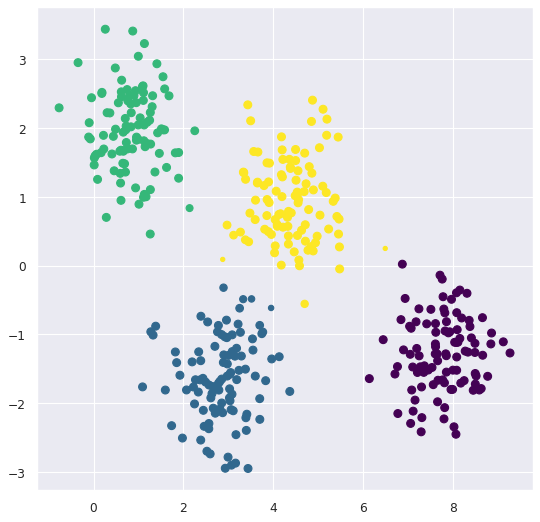

In [132]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [133]:
gmm.converged_

True

In [134]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

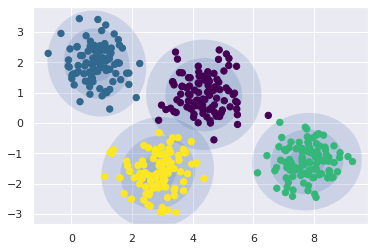

In [135]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

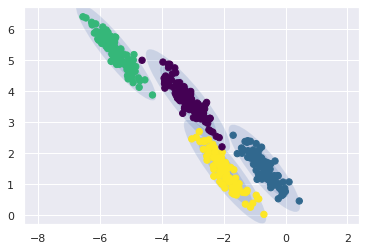

In [136]:
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

### Fazendo predição de novos dados

In [137]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [138]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [139]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2])

In [140]:
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

In [141]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [142]:
y_new

array([0, 0, 1, 2, 2, 2])

### Density Estimation

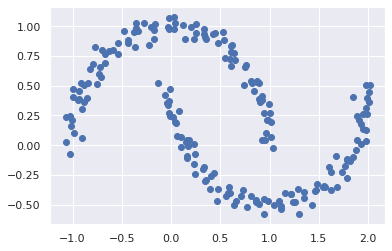

In [143]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

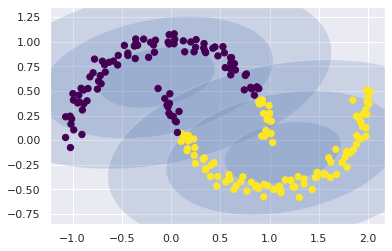

In [144]:
gmm_ds = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm_ds, Xmoon)

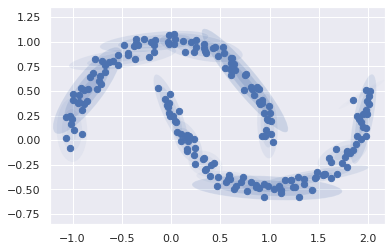

In [145]:
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

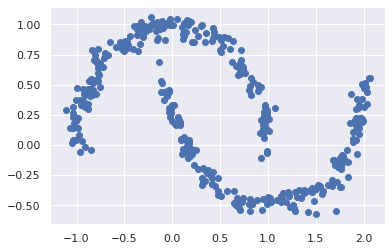

In [146]:
Xnew = gmm16.sample(400)
plt.scatter(Xnew[0][:,0], Xnew[0][:,1]);

### Tipo de Covariância

In [147]:
#função auxiliar definida na aula do kmeans para visualizar os centróides
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [148]:
# função auxiliar para plotar as fronteiras de decisão de uma GMM
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [149]:
#função auxiliar para comparar, 2 a 2, os diferentes tipos de covariância
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

In [150]:
# instanciando os 4 tipos de covariância
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

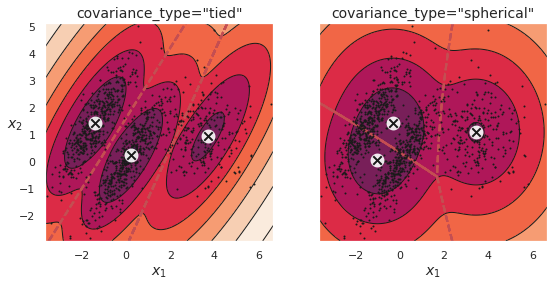

In [151]:
# comparando tied e spherical
compare_gaussian_mixtures(gm_tied, gm_spherical, X)
plt.show()

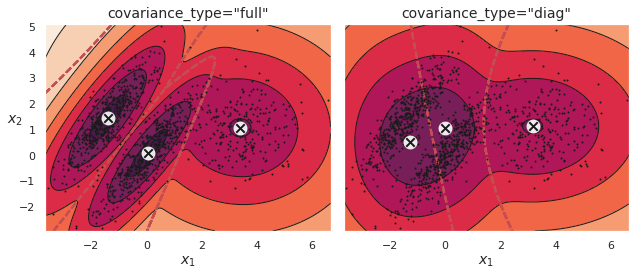

In [152]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

## Detecção de Anomalia usando GMM

In [153]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

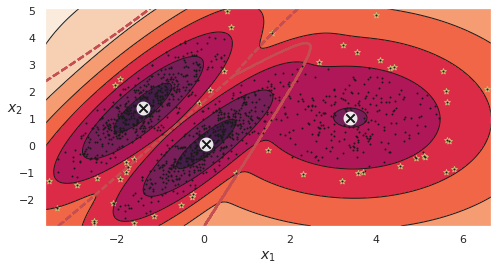

In [154]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='y', marker='*')
plt.ylim(top=5.1)

plt.show()

## Selecionando o número de Cluster

In [155]:
gm.bic(X)

8189.747000497186

In [156]:
gm.aic(X)

8102.521720382148

Vamos treinar vários GMM com vários valores de k e mensurar BIC e AIC

In [157]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [158]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

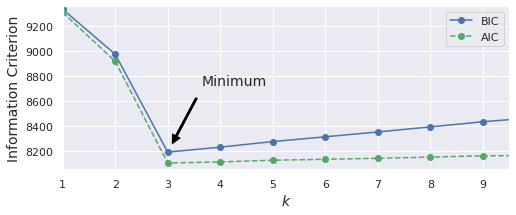

In [159]:
#agora plotamos os valores para verificar o melhor valor de k
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

Por último, podemos procurar pela melhor combinação de valores tanto para o número de clusters quanto o tipo de covariância

In [160]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [161]:
best_k

3

In [162]:
best_covariance_type

'full'

# Topic Modelling usando Latent Dirichlet Allocation (LDA)

Algumas considerações antes de estudarmos LDA:

* Como a disciplina não é de NLP (Processamento de Linguagem Natural), alguns métodos que utilizei aqui não serão explicados em detalhes, mas tentarei ser o mais didádito possível para torná-los compreensíveis

* Gensim é uma biblioteca voltada para NLP que possui vários métodos de tratamento de textos e algoritmos para transformar textos

* NLTK é um toolkit que contém vários métodos de tratamento de textos e dicionários incorporados

In [163]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
nltk.download('wordnet')
import numpy as np
np.random.seed(42)
from gensim import corpora, models
from pprint import pprint

[nltk_data] Downloading package wordnet to /home/m17/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [164]:
data = pd.read_csv('bases/abcnews-date-text.csv', error_bad_lines=False, nrows=500000)
print(data.head())
documents = data[['headline_text']]
documents['index'] = documents.index
print()
documents.head()

/nix/store/xmds0awwj6cg32rk90qzbgb24pbfr5gk-python3-3.9.10-env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


   publish_date                                      headline_text
0      20030219  aba decides against community broadcasting lic...
1      20030219     act fire witnesses must be aware of defamation
2      20030219     a g calls for infrastructure protection summit
3      20030219           air nz staff in aust strike for pay rise
4      20030219      air nz strike to affect australian travellers



,headline_text,index
0,aba decides against community broadcasting lic...,0
1,act fire witnesses must be aware of defamation,1
2,a g calls for infrastructure protection summit,2
3,air nz staff in aust strike for pay rise,3
4,air nz strike to affect australian travellers,4


In [165]:
len(documents)

500000

### Pré-processamento dos dados

É uma etapa crucial na análise de textos, em que tratamos eles de maneira correta para usa-los como input para algoritmos de machine learning. Aqui, vamos executar os seguintes passos:

1. Tokenização: divide o texto em sentenças e as sentenças em palavras; remove toda pontuação e deixa todas as palavras em minúscula

2. Elimina palavra que possuem menos de 3 caracteres

3. Elimina as stopwords

4. Lematização e Stemização

A lematização é o processo de tornar uma palavra em sua raiz, conforme exemplo:

In [166]:
#nltk.download('omw-1.4')
print(WordNetLemmatizer().lemmatize('went', pos='v'))
# pos = part of speech -> tageamento de palavras conforme sua classe gramatical

go


Stemização é o processo de eliminar os radicais de uma palavra, conforme exemplos:

In [167]:
stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


Vamos escrever duas funções:

1. Aplicação de lemmatização e stemização nas palavras

2. pré-processamento do texto conforme indicado acima

In [168]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

Vamos pegar um exemplo e comparar sua forma original com sua forma tratada:

In [169]:
doc_sample = documents[documents['index'] == 620].values[0][0]

print('Documento original: ')
print(documents[documents['index'] == 620])
print()
print('Palavras do Documento original')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n Documento processado: ')
print(preprocess(doc_sample))

Documento original: 
                                    headline_text  index
620  pm has no choice but to stay on through iraq    620

Palavras do Documento original
['pm', 'has', 'no', 'choice', 'but', 'to', 'stay', 'on', 'through', 'iraq']


 Documento processado: 
['choic', 'stay', 'iraq']


Vamos aplicar o pré-processamento a todo o texto agora:

In [170]:
processed_docs = documents['headline_text'].map(preprocess)
processed_docs[:5]

0     [decid, communiti, broadcast, licenc]
1                        [wit, awar, defam]
2    [call, infrastructur, protect, summit]
3               [staff, aust, strike, rise]
4      [strike, affect, australian, travel]
Name: headline_text, dtype: object

### Bag-of-Words

* A partir de processed_docs, vamos criar um dicionário que contém o número de vezes que uma palavra apareceu no conjunto de treino

In [171]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 broadcast
1 communiti
2 decid
3 licenc
4 awar
5 defam
6 wit
7 call
8 infrastructur
9 protect
10 summit


Agora, vamos aplicar um filtros nos tokens que aparecem em:

1. menos que 15 números;

2. mais que 0.5 documentos (fração do corpus total (total de documentos))

3. depois dos dois primeiros passos, mantém apenas os primeiros 100000 tokens mais frequentes

In [172]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

### doc2bow

Para cada documento, criamos um dicionário que relata palavras e quantas vezes elas apareceram:

In [173]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[620]

[(35, 1), (401, 1), (1344, 1)]

Vamos olhar como fica nosso exemplo pre-processado:

In [174]:
bow_doc_620 = bow_corpus[620]

for i in range(len(bow_doc_620)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_620[i][0], 
                                                     dictionary[bow_doc_620[i][0]], 
                                                     bow_doc_620[i][1]))

Word 35 ("iraq") appears 1 time.
Word 401 ("stay") appears 1 time.
Word 1344 ("choic") appears 1 time.


## TF-IDF

* TF (Term-Frequency): quanto mais uma palavra aparece num documento, mais relevante ela é para descrever esse documento

* IDF (Inverse-Document Frequency): palavras que aparecem raras vezes num documento também podem ser bons descritores desse documento

A ideia do TF-IDF é ponderar a relevância das palavras num documento

In [175]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [176]:
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.5986248990262237),
 (1, 0.3901056421841678),
 (2, 0.48578257470253805),
 (3, 0.5034690738439597)]


## Executando LDA usando Bag-of-Words

Após realizar o tratamento dos textos, vamos agora executar o LDA e analisar seus resultados. 

In [177]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

Para cada tópilo, vamos explorar a ocorrência de palavras neste tópico e seu peso relativo:

In [178]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.041*"interview" + 0.041*"charg" + 0.031*"court" + 0.026*"face" + 0.024*"polic" + 0.022*"murder" + 0.022*"jail" + 0.021*"accus" + 0.016*"drug" + 0.015*"tell"
Topic: 1 
Words: 0.034*"attack" + 0.018*"year" + 0.017*"deal" + 0.017*"home" + 0.016*"famili" + 0.015*"head" + 0.013*"drive" + 0.012*"drink" + 0.012*"high" + 0.011*"sign"
Topic: 2 
Words: 0.020*"win" + 0.018*"take" + 0.013*"rescu" + 0.012*"race" + 0.012*"world" + 0.012*"climat" + 0.011*"extend" + 0.010*"award" + 0.010*"fin" + 0.009*"join"
Topic: 3 
Words: 0.063*"polic" + 0.037*"death" + 0.026*"miss" + 0.018*"probe" + 0.016*"investig" + 0.013*"search" + 0.013*"brisban" + 0.012*"bodi" + 0.012*"forc" + 0.011*"premier"
Topic: 4 
Words: 0.029*"fund" + 0.020*"market" + 0.018*"servic" + 0.017*"health" + 0.016*"push" + 0.015*"centr" + 0.014*"boost" + 0.013*"fall" + 0.012*"break" + 0.011*"continu"
Topic: 5 
Words: 0.045*"kill" + 0.028*"rise" + 0.019*"dead" + 0.015*"lead" + 0.014*"leader" + 0.014*"obama" + 0.014*"bank" + 0

### Executando LDA usando TF-IDF
Vamos executar o LDA usando a outra abordagem agora

In [179]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [180]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.010*"govt" + 0.009*"health" + 0.009*"fund" + 0.007*"plan" + 0.007*"urg" + 0.007*"council" + 0.007*"boost" + 0.007*"road" + 0.006*"indigen" + 0.006*"rise"
Topic: 1 Word: 0.007*"kill" + 0.007*"bash" + 0.007*"polic" + 0.006*"suicid" + 0.006*"senat" + 0.006*"robberi" + 0.005*"gaza" + 0.005*"govt" + 0.005*"law" + 0.005*"israel"
Topic: 2 Word: 0.038*"interview" + 0.010*"climat" + 0.010*"govern" + 0.007*"chang" + 0.005*"hour" + 0.005*"extend" + 0.005*"respons" + 0.005*"arriv" + 0.005*"come" + 0.004*"thai"
Topic: 3 Word: 0.015*"rudd" + 0.012*"say" + 0.007*"news" + 0.006*"labor" + 0.006*"afghanistan" + 0.005*"govt" + 0.005*"hill" + 0.005*"live" + 0.005*"troop" + 0.005*"talk"
Topic: 4 Word: 0.025*"charg" + 0.017*"polic" + 0.016*"murder" + 0.015*"court" + 0.011*"jail" + 0.011*"accus" + 0.011*"face" + 0.010*"assault" + 0.010*"stab" + 0.010*"drug"
Topic: 5 Word: 0.009*"obama" + 0.007*"miner" + 0.006*"hors" + 0.006*"pair" + 0.005*"infrastructur" + 0.005*"crop" + 0.005*"kid" + 0.004*

## Avaliação dos Modelos
Vamos agora avaliar os modelos

### Usando Bag-of-Words

In [181]:
for index, score in sorted(lda_model[bow_corpus[620]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.275019109249115	 
Topic: 0.045*"kill" + 0.028*"rise" + 0.019*"dead" + 0.015*"lead" + 0.014*"leader" + 0.014*"obama" + 0.014*"bank" + 0.012*"blast" + 0.012*"bomb" + 0.011*"pakistan"

Score: 0.27501794695854187	 
Topic: 0.015*"aussi" + 0.015*"final" + 0.013*"lose" + 0.013*"return" + 0.010*"australia" + 0.009*"tiger" + 0.009*"play" + 0.008*"test" + 0.008*"tour" + 0.008*"adelaid"

Score: 0.274938702583313	 
Topic: 0.020*"win" + 0.018*"take" + 0.013*"rescu" + 0.012*"race" + 0.012*"world" + 0.012*"climat" + 0.011*"extend" + 0.010*"award" + 0.010*"fin" + 0.009*"join"

Score: 0.0250034611672163	 
Topic: 0.041*"interview" + 0.041*"charg" + 0.031*"court" + 0.026*"face" + 0.024*"polic" + 0.022*"murder" + 0.022*"jail" + 0.021*"accus" + 0.016*"drug" + 0.015*"tell"

Score: 0.0250034611672163	 
Topic: 0.034*"attack" + 0.018*"year" + 0.017*"deal" + 0.017*"home" + 0.016*"famili" + 0.015*"head" + 0.013*"drive" + 0.012*"drink" + 0.012*"high" + 0.011*"sign"

Score: 0.0250034611672163	 
Topic: 0.

### Usando TF-IDF

In [182]:
for index, score in sorted(lda_model_tfidf[bow_corpus[620]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.42991799116134644	 
Topic: 0.009*"obama" + 0.007*"miner" + 0.006*"hors" + 0.006*"pair" + 0.005*"infrastructur" + 0.005*"crop" + 0.005*"kid" + 0.004*"sign" + 0.004*"redback" + 0.004*"fiji"

Score: 0.3700074255466461	 
Topic: 0.015*"rudd" + 0.012*"say" + 0.007*"news" + 0.006*"labor" + 0.006*"afghanistan" + 0.005*"govt" + 0.005*"hill" + 0.005*"live" + 0.005*"troop" + 0.005*"talk"

Score: 0.025012381374835968	 
Topic: 0.038*"interview" + 0.010*"climat" + 0.010*"govern" + 0.007*"chang" + 0.005*"hour" + 0.005*"extend" + 0.005*"respons" + 0.005*"arriv" + 0.005*"come" + 0.004*"thai"

Score: 0.025011971592903137	 
Topic: 0.016*"crash" + 0.010*"kill" + 0.008*"plane" + 0.008*"award" + 0.007*"honour" + 0.006*"injur" + 0.006*"die" + 0.006*"mark" + 0.006*"dead" + 0.006*"celebr"

Score: 0.025011859834194183	 
Topic: 0.009*"swine" + 0.007*"aussi" + 0.006*"open" + 0.006*"final" + 0.006*"swan" + 0.005*"lead" + 0.005*"titl" + 0.005*"biki" + 0.005*"win" + 0.005*"world"

Score: 0.0250101853162050

## Testando o modelo em documentos não vistos

In [183]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.3498992919921875	 Topic: 0.023*"coast" + 0.016*"gold" + 0.015*"swine" + 0.015*"south" + 0.014*"bushfir"
Score: 0.1834477037191391	 Topic: 0.034*"attack" + 0.018*"year" + 0.017*"deal" + 0.017*"home" + 0.016*"famili"
Score: 0.18331940472126007	 Topic: 0.045*"kill" + 0.028*"rise" + 0.019*"dead" + 0.015*"lead" + 0.014*"leader"
Score: 0.18325914442539215	 Topic: 0.020*"win" + 0.018*"take" + 0.013*"rescu" + 0.012*"race" + 0.012*"world"
Score: 0.016681768000125885	 Topic: 0.029*"fund" + 0.020*"market" + 0.018*"servic" + 0.017*"health" + 0.016*"push"
Score: 0.016679605469107628	 Topic: 0.032*"govt" + 0.031*"plan" + 0.025*"council" + 0.019*"water" + 0.016*"urg"
Score: 0.01667925715446472	 Topic: 0.038*"crash" + 0.025*"hospit" + 0.023*"talk" + 0.021*"road" + 0.019*"die"
Score: 0.01667792908847332	 Topic: 0.041*"interview" + 0.041*"charg" + 0.031*"court" + 0.026*"face" + 0.024*"polic"
Score: 0.01667792908847332	 Topic: 0.063*"polic" + 0.037*"death" + 0.026*"miss" + 0.018*"probe" + 0.016*